In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
from pandas import DataFrame
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 1, 's' : 40, 'linewidths':0}

In [2]:
#test_data= pd.read_excel('C:/Users/Bhupesh/Documents/MATLAB/Project/HDBdatanew.xlsx')
#df = pd.DataFrame(test_data)

In [3]:
#test_data= pd.read_excel('C:/Users/Bhupesh/Documents/MATLAB/Project/KT_KR_ALLnew.xlsx')
#df = pd.DataFrame(test_data)

In [2]:
test_data= pd.read_excel('C:/Users/Bhupesh/Documents/MATLAB/Project/my raw data/KT_KR_2_7_my_new.xlsx',sheet_name='Sheet4')
df = pd.DataFrame(test_data)

In [3]:
df=df.loc[:,['KR','Tavg']]
df.head

<bound method NDFrame.head of                KR      Tavg
0        5.205019  0.000344
1      143.314206  0.001031
2      263.937469  0.002061
3      486.626956  0.003432
4      700.104678  0.005143
..            ...       ...
355   5670.204191  0.000482
356   6210.790597  0.000317
357   8469.001310  0.000180
358  14357.644353  0.000077
359  34501.455822  0.000015

[360 rows x 2 columns]>

<AxesSubplot:xlabel='Tavg', ylabel='KR'>

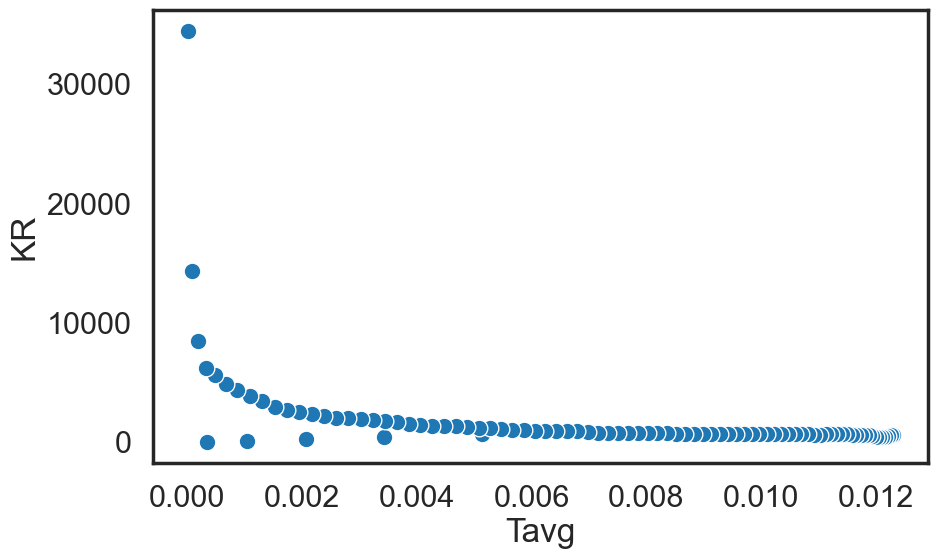

In [5]:
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(data=df,x='Tavg',y='KR')

In [6]:
#df['KR']=np.log(df['KR'])
#df['Tavg']=np.log(df['Tavg'])
#df['KT']=np.log(df['KT'])

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scalar=MinMaxScaler()
scalar.fit(df)
Norm=scalar.transform(df)
df[['KR','Tavg']]=Norm
df

,KR,Tavg
0,3.523657e-19,0.026747
1,4.003600e-03,0.082689
2,7.500306e-03,0.166488
3,1.395578e-02,0.278058
4,2.014421e-02,0.417303
...,...,...
355,1.642207e-01,0.037965
356,1.798916e-01,0.024526
357,2.453541e-01,0.013388
358,4.160579e-01,0.005048


In [8]:
import hdbscan

In [9]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10,min_samples=5,allow_single_cluster=True,gen_min_span_tree=True,)
clusterer.fit(df)
clusterer.labels_.max()

0

In [10]:
#for KR
#clusterer = hdbscan.HDBSCAN(min_cluster_size=20,min_samples=7,allow_single_cluster=True,gen_min_span_tree=True)
#clusterer.fit(df)
#clusterer.labels_.max()

<AxesSubplot:>

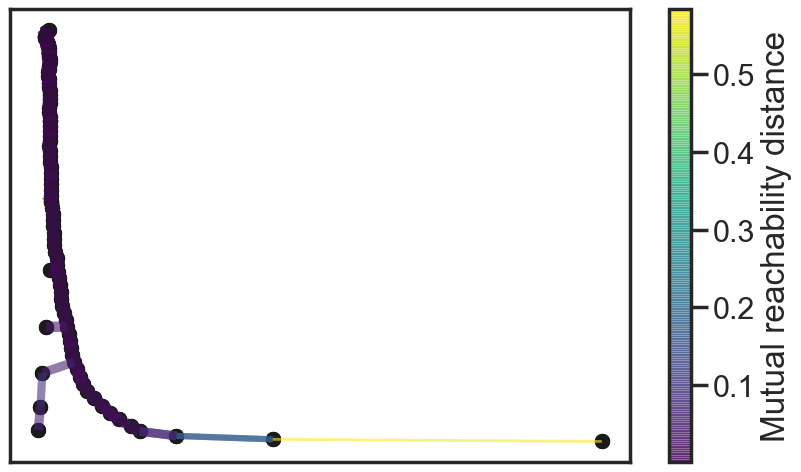

In [11]:
plt.figure(figsize=(10,6),dpi=100)
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)

<AxesSubplot:ylabel='$\\lambda$ value'>

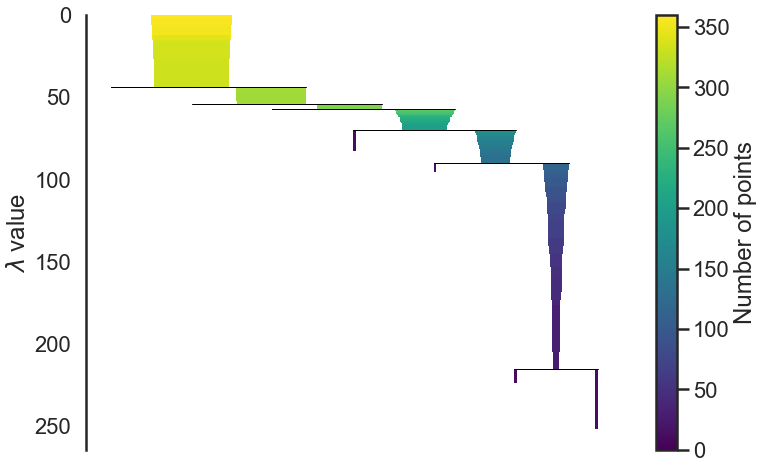

In [12]:
plt.figure(figsize=(12,8))
clusterer.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

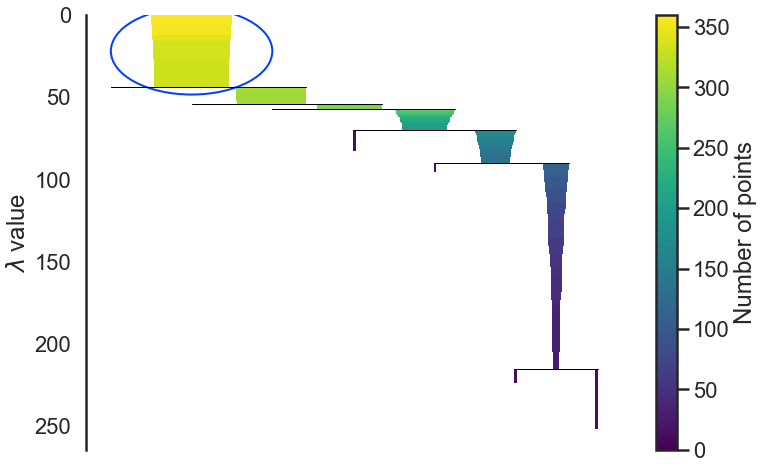

In [13]:
plt.figure(figsize=(12,8))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette("bright", 100))

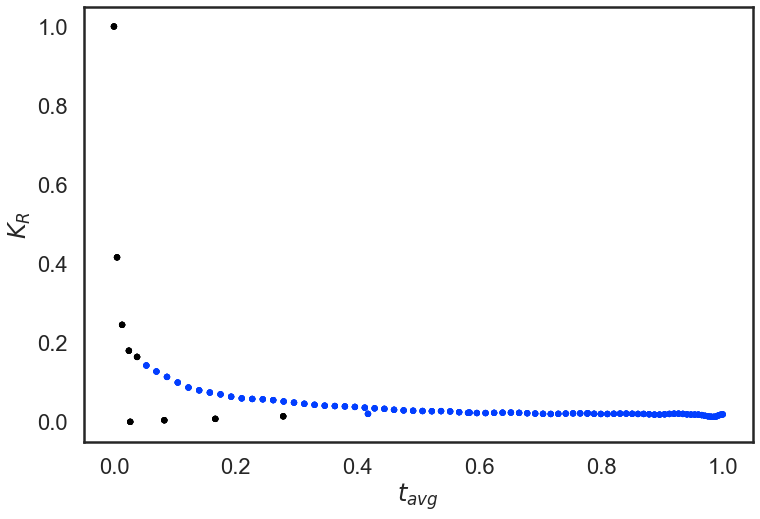

In [28]:
palette = sns.color_palette("bright", 100)
cluster_colors = [sns.desaturate(palette[col], sat) 
                  if col >= 0 else (0, 0, 0) for col, sat in 
                  zip(clusterer.labels_, clusterer.probabilities_)]
df.plot.scatter(x='Tavg', y='KR', c=cluster_colors, **plot_kwds,figsize=(12,8))
plt.xlabel(r'$t_{avg}$')
plt.ylabel(r'$K_R$')
plt.savefig("IT_1_KR_HDBSCAN.jpg")

In [29]:
Norm=scalar.inverse_transform(df)
df[['KR','Tavg']]=Norm
df

,KR,Tavg
0,5.205019,0.000344
1,143.314206,0.001031
2,263.937469,0.002061
3,486.626956,0.003432
4,700.104678,0.005143
...,...,...
355,5670.204191,0.000482
356,6210.790597,0.000317
357,8469.001310,0.000180
358,14357.644353,0.000077


In [30]:
df['label']= clusterer.labels_
df['color']=cluster_colors
df

,KR,Tavg,label,color
0,5.205019,0.000344,-1,"(0, 0, 0)"
1,143.314206,0.001031,-1,"(0, 0, 0)"
2,263.937469,0.002061,-1,"(0, 0, 0)"
3,486.626956,0.003432,-1,"(0, 0, 0)"
4,700.104678,0.005143,0,"(0.007843137254901933, 0.2431372549019607, 1.0)"
...,...,...,...,...
355,5670.204191,0.000482,-1,"(0, 0, 0)"
356,6210.790597,0.000317,-1,"(0, 0, 0)"
357,8469.001310,0.000180,-1,"(0, 0, 0)"
358,14357.644353,0.000077,-1,"(0, 0, 0)"


In [56]:
#rx=df[(df['label']!=-1)&(df['label']!=0)&(df['label']!=1)&(df['label']!=2)&(df['label']!=3)]

In [31]:
#rx=df[(df['label']!=-1)&(df['label']!=0)]
rx=df[(df['label']!=-1)]

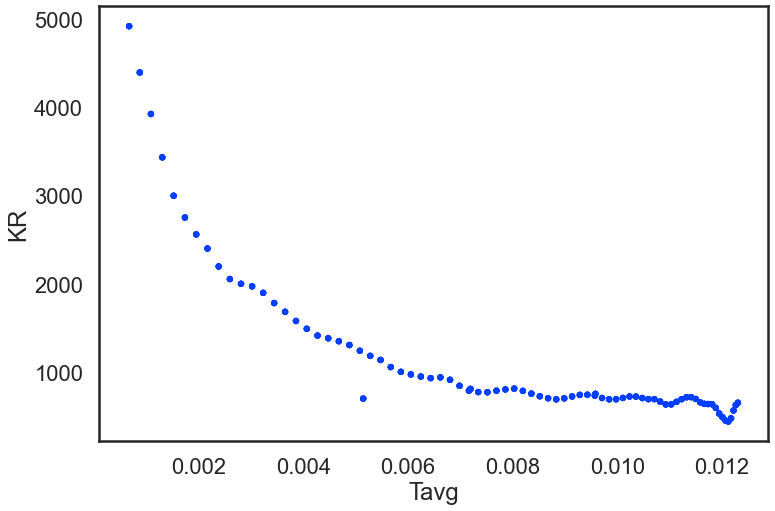

In [32]:
rx.plot.scatter(x='Tavg', y='KR',c=rx.color, **plot_kwds,figsize=(12,8))
rx=rx[['KR','Tavg']]

In [59]:
#rx.to_excel(r'C:\Users\Bhupesh\Documents\MATLAB\Project\HDBnewdata_single.xlsx',sheet_name='Sheet1')

In [33]:
scalar=MinMaxScaler()
scalar.fit(rx)
Norm=scalar.transform(rx)
rx[['KR','Tavg']]=Norm
rx

,KR,Tavg
4,0.058096,0.384556
5,0.082457,0.560746
6,0.070035,0.765936
7,0.047568,1.000000
8,0.041723,0.996580
...,...,...
350,0.571107,0.073088
351,0.668211,0.054465
352,0.777934,0.035808
353,0.882919,0.017478


In [34]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10,min_samples=5,allow_single_cluster=True,gen_min_span_tree=True)
clusterer.fit(rx)
clusterer.labels_.max()

0

<AxesSubplot:ylabel='$\\lambda$ value'>

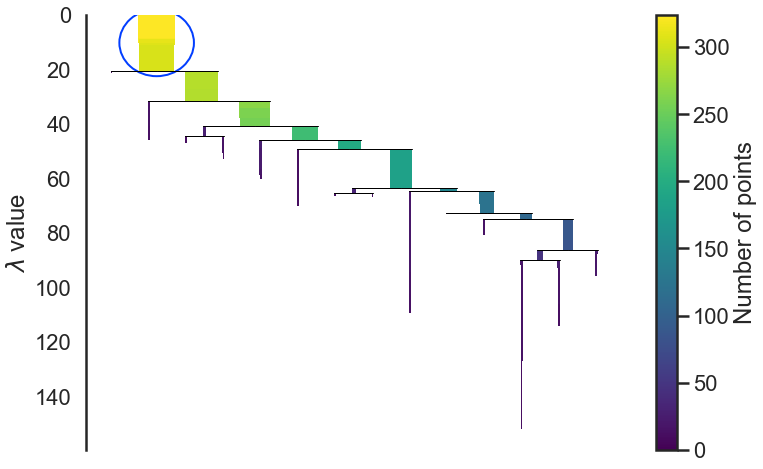

In [35]:
plt.figure(figsize=(12,8))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette("bright", 100))

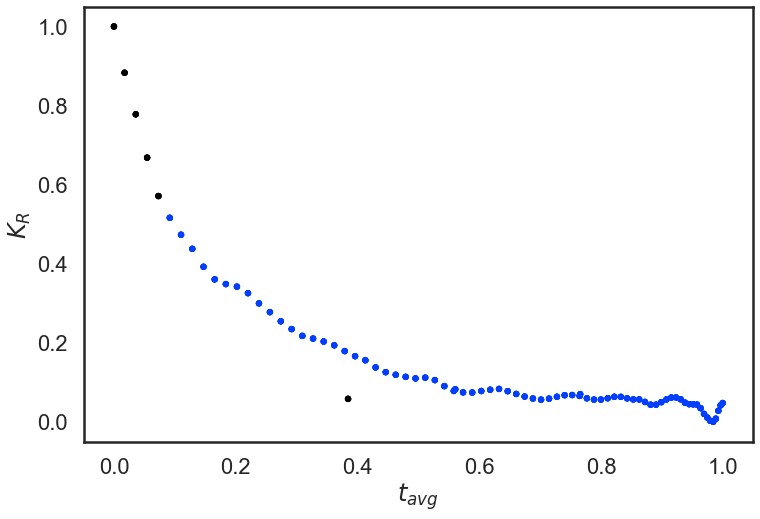

In [36]:
palette = sns.color_palette("bright", 100)
cluster_colors = [sns.desaturate(palette[col], sat) 
                  if col >= 0 else (0, 0, 0) for col, sat in 
                  zip(clusterer.labels_, clusterer.probabilities_)]
rx.plot.scatter(x='Tavg', y='KR', c=cluster_colors, **plot_kwds,figsize=(12,8))
plt.xlabel(r'$t_{avg}$')
plt.ylabel(r'$K_R$')
plt.savefig("IT_2_KR_HDBSCAN.jpg")

In [64]:
Norm=scalar.inverse_transform(rx)
rx[['KR','Tavg']]=Norm
rx

,KR,Tavg
4,700.104678,0.005143
5,809.284187,0.007192
6,753.613652,0.009579
7,652.921630,0.012302
8,626.726004,0.012262
...,...,...
350,2999.269919,0.001519
351,3434.460259,0.001303
352,3926.208411,0.001086
353,4396.719073,0.000873


In [65]:
rx['label']= clusterer.labels_
rx['color']=cluster_colors
rx

,KR,Tavg,label,color
4,700.104678,0.005143,-1,"(0, 0, 0)"
5,809.284187,0.007192,0,"(0.007843137254901933, 0.2431372549019607, 1.0)"
6,753.613652,0.009579,0,"(0.007843137254901933, 0.2431372549019607, 1.0)"
7,652.921630,0.012302,0,"(0.007843137254901933, 0.2431372549019607, 1.0)"
8,626.726004,0.012262,0,"(0.007843137254901933, 0.2431372549019607, 1.0)"
...,...,...,...,...
350,2999.269919,0.001519,-1,"(0, 0, 0)"
351,3434.460259,0.001303,-1,"(0, 0, 0)"
352,3926.208411,0.001086,-1,"(0, 0, 0)"
353,4396.719073,0.000873,-1,"(0, 0, 0)"


In [31]:
rx=rx[(rx['label']!=-1)&(rx['label']!=1)]

In [66]:
rx=rx[(rx['label']!=-1)]

In [52]:
#rx['KR']=np.exp(rx['KR'])
#rx['Tavg']=np.exp(rx['Tavg'])
#rx['KT']=np.exp(rx['KT'])

<ipython-input-52-4006d8d5a2bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rx['KR']=np.exp(rx['KR'])
<ipython-input-52-4006d8d5a2bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rx['Tavg']=np.exp(rx['Tavg'])


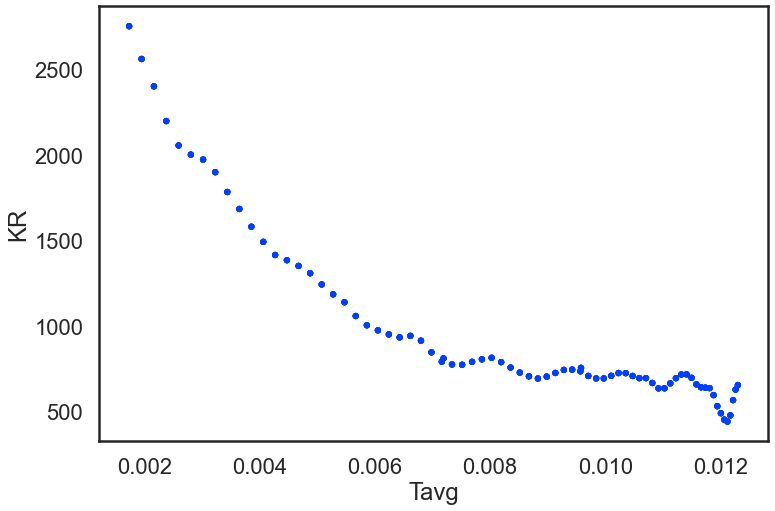

In [67]:
rx.plot.scatter(x='Tavg', y='KR',c=rx.color, **plot_kwds,figsize=(12,8))
rx=rx[['KR','Tavg']]

In [75]:
rx.to_excel(r'C:\Users\Bhupesh\Documents\MATLAB\Project\my raw data\KR_final_data_my.xlsx',sheet_name='Sheet4')